In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")





In [ ]:

torch.manual_seed(42)
x = torch.linspace(-2, 2, 200).view(-1, 1) 
y1 = x**3
y2 = x**2 + torch.sin(x)



In [ ]:

dataset1 = TensorDataset(x, y1)
dataset2 = TensorDataset(x, y2)

loader1 = DataLoader(dataset1, batch_size=32, shuffle=True)
loader2 = DataLoader(dataset2, batch_size=32, shuffle=True)


In [18]:
# Model 1: Shallow
class DNN_Shallow(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

# Model 2: Medium
class DNN_Medium(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

# Model 3: Deep
class DNN_Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)


In [ ]:
def train_function_model(model, loader, epochs=500, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        for bx, by in loader:
            optimizer.zero_grad()
            output = model(bx)
            loss = criterion(output, by)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(loader))
    return losses


model_shallow = DNN_Shallow()
model_medium = DNN_Medium()
model_deep = DNN_Deep()


loss_shallow = train_function_model(model_shallow, loader1)
loss_medium = train_function_model(model_medium, loader1)
loss_deep = train_function_model(model_deep, loader1)


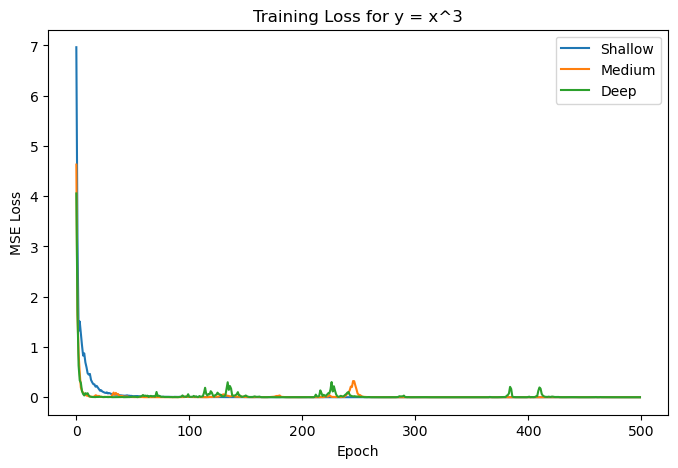

In [20]:
plt.figure(figsize=(8,5))
plt.plot(loss_shallow, label='Shallow')
plt.plot(loss_medium, label='Medium')
plt.plot(loss_deep, label='Deep')
plt.title('Training Loss for y = x^3')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


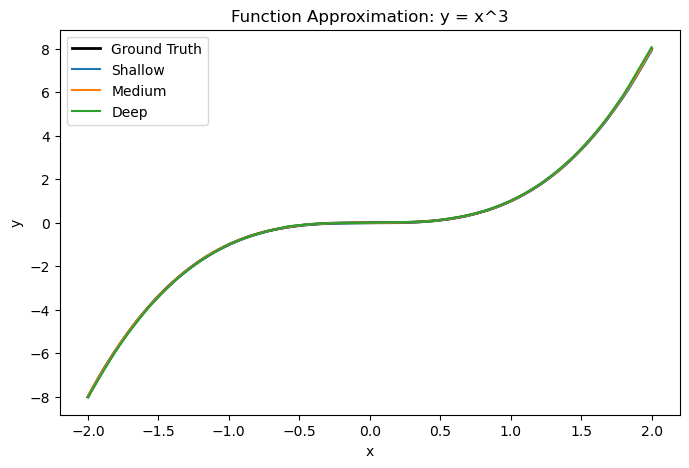

In [21]:
with torch.no_grad():
    y_pred_shallow = model_shallow(x)
    y_pred_medium = model_medium(x)
    y_pred_deep = model_deep(x)

plt.figure(figsize=(8,5))
plt.plot(x.numpy(), y1.numpy(), label='Ground Truth', color='black', linewidth=2)
plt.plot(x.numpy(), y_pred_shallow.numpy(), label='Shallow')
plt.plot(x.numpy(), y_pred_medium.numpy(), label='Medium')
plt.plot(x.numpy(), y_pred_deep.numpy(), label='Deep')
plt.title('Function Approximation: y = x^3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




In [ ]:

loss_shallow2 = train_function_model(model_shallow, loader2)
loss_medium2 = train_function_model(model_medium, loader2)
loss_deep2 = train_function_model(model_deep, loader2)



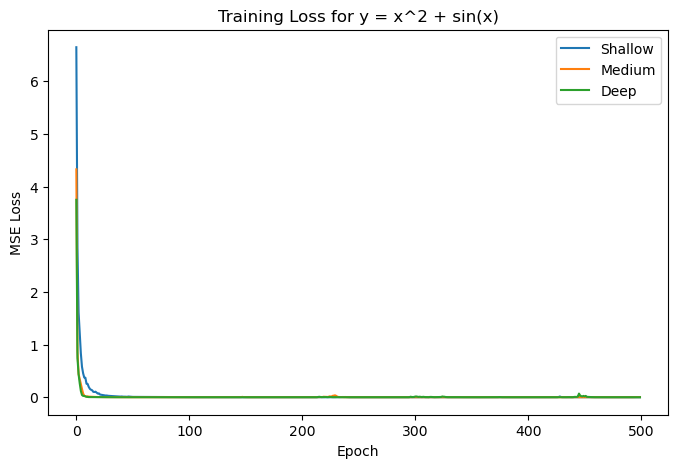

In [23]:
plt.figure(figsize=(8,5))
plt.plot(loss_shallow2, label='Shallow')
plt.plot(loss_medium2, label='Medium')
plt.plot(loss_deep2, label='Deep')
plt.title('Training Loss for y = x^2 + sin(x)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


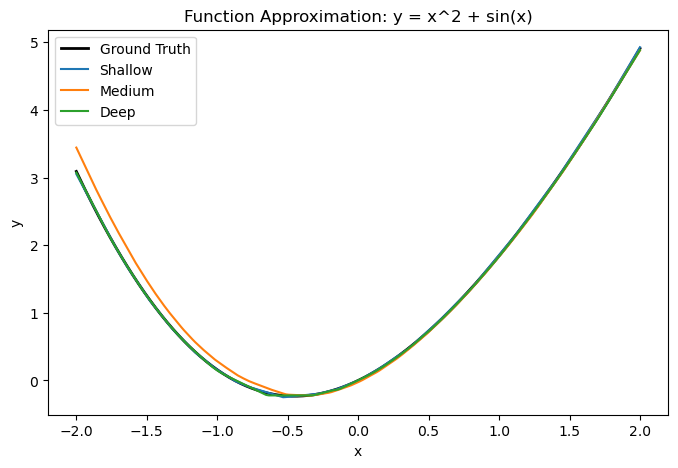

In [24]:
with torch.no_grad():
    y_pred_shallow2 = model_shallow(x)
    y_pred_medium2 = model_medium(x)
    y_pred_deep2 = model_deep(x)

plt.figure(figsize=(8,5))
plt.plot(x.numpy(), y2.numpy(), label='Ground Truth', color='black', linewidth=2)
plt.plot(x.numpy(), y_pred_shallow2.numpy(), label='Shallow')
plt.plot(x.numpy(), y_pred_medium2.numpy(), label='Medium')
plt.plot(x.numpy(), y_pred_deep2.numpy(), label='Deep')
plt.title('Function Approximation: y = x^2 + sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [41]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [42]:
# DNN for MNIST
class MNIST_DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.net(x)

# CNN for MNIST
class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x
    




In [43]:
class MNIST_CNN_Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*7*7, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x


In [ ]:
def train_mnist(model, train_loader, test_loader, epochs=5, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_loss, test_loss = [], []
    train_acc, test_acc = [], []

    for epoch in range(epochs):
        
        model.train()
        running_loss = 0
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss.append(running_loss / len(train_loader))
        train_acc.append(correct / total)
        
        # --- Testing ---
        model.eval()
        running_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_loss.append(running_loss / len(test_loader))
        test_acc.append(correct / total)
        
        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, "
              f"Test Loss: {test_loss[-1]:.4f}, Test Acc: {test_acc[-1]:.4f}")
        
    return train_loss, test_loss, train_acc, test_acc


In [ ]:

dnn_model = MNIST_DNN()
cnn_model = MNIST_CNN()
deep_cnn_model = MNIST_CNN_Deep()


dnn_train_loss, dnn_test_loss, dnn_train_acc, dnn_test_acc = train_mnist(dnn_model, train_loader, test_loader, epochs=5)
cnn_train_loss, cnn_test_loss, cnn_train_acc, cnn_test_acc = train_mnist(cnn_model, train_loader, test_loader, epochs=5)
deep_cnn_train_loss, deep_cnn_test_loss, deep_cnn_train_acc, deep_cnn_test_acc = train_mnist(deep_cnn_model, train_loader, test_loader, epochs=5)


Epoch [1/5] Train Loss: 0.2915, Train Acc: 0.9169, Test Loss: 0.1326, Test Acc: 0.9603
Epoch [2/5] Train Loss: 0.1102, Train Acc: 0.9670, Test Loss: 0.1042, Test Acc: 0.9672
Epoch [3/5] Train Loss: 0.0722, Train Acc: 0.9780, Test Loss: 0.0850, Test Acc: 0.9727
Epoch [4/5] Train Loss: 0.0521, Train Acc: 0.9837, Test Loss: 0.0743, Test Acc: 0.9752
Epoch [5/5] Train Loss: 0.0392, Train Acc: 0.9869, Test Loss: 0.0728, Test Acc: 0.9782
Epoch [1/5] Train Loss: 0.2320, Train Acc: 0.9303, Test Loss: 0.0718, Test Acc: 0.9779
Epoch [2/5] Train Loss: 0.0644, Train Acc: 0.9801, Test Loss: 0.0453, Test Acc: 0.9857
Epoch [3/5] Train Loss: 0.0441, Train Acc: 0.9860, Test Loss: 0.0406, Test Acc: 0.9854
Epoch [4/5] Train Loss: 0.0344, Train Acc: 0.9893, Test Loss: 0.0358, Test Acc: 0.9875
Epoch [5/5] Train Loss: 0.0272, Train Acc: 0.9916, Test Loss: 0.0327, Test Acc: 0.9888
Epoch [1/5] Train Loss: 0.1928, Train Acc: 0.9393, Test Loss: 0.0424, Test Acc: 0.9856
Epoch [2/5] Train Loss: 0.0667, Train Acc: 

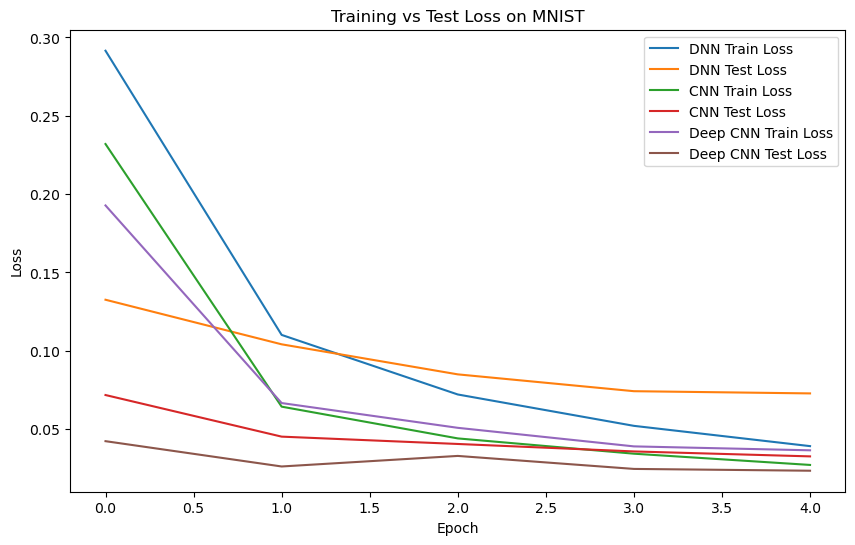

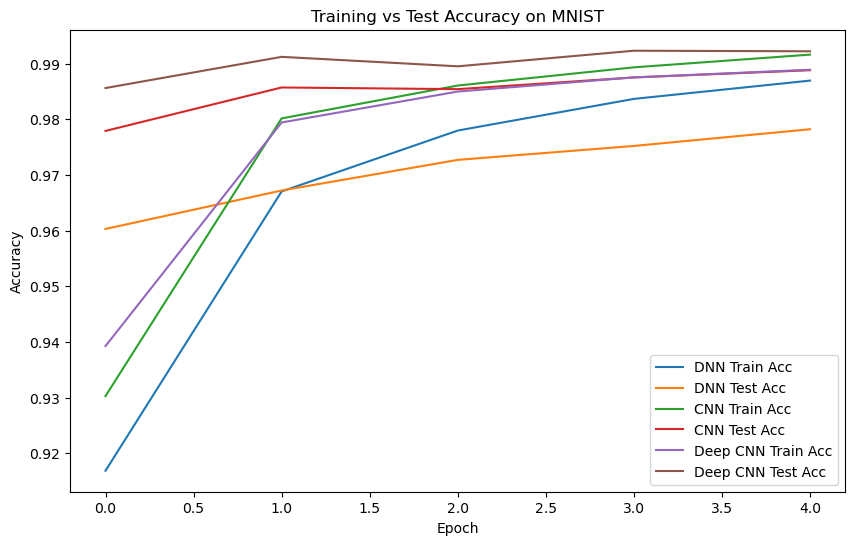

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(dnn_train_loss, label='DNN Train Loss')
plt.plot(dnn_test_loss, label='DNN Test Loss')
plt.plot(cnn_train_loss, label='CNN Train Loss')
plt.plot(cnn_test_loss, label='CNN Test Loss')
plt.plot(deep_cnn_train_loss, label='Deep CNN Train Loss')
plt.plot(deep_cnn_test_loss, label='Deep CNN Test Loss')
plt.title('Training vs Test Loss on MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.plot(dnn_train_acc, label='DNN Train Acc')
plt.plot(dnn_test_acc, label='DNN Test Acc')
plt.plot(cnn_train_acc, label='CNN Train Acc')
plt.plot(cnn_test_acc, label='CNN Test Acc')
plt.plot(deep_cnn_train_acc, label='Deep CNN Train Acc')
plt.plot(deep_cnn_test_acc, label='Deep CNN Test Acc')
plt.title('Training vs Test Accuracy on MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
